<a href="https://colab.research.google.com/github/Anirudhsahu/ANIRUDH/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST**

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x = np.array(x)
y = np.array(y)
y = y.astype('int')
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

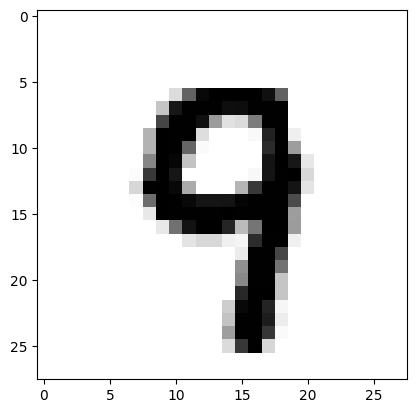

In [ ]:
  img=x[520]
  img=img.reshape(28,28)
  plt.imshow(img, cmap=matplotlib.cm.binary,interpolation='nearest')

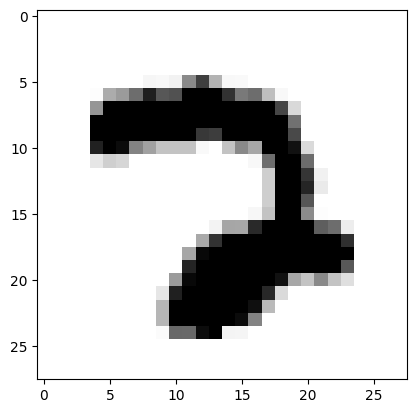

In [ ]:
  img=x[120]
  img=img.reshape(28,28)
  plt.imshow(img, cmap=matplotlib.cm.binary,interpolation='nearest')

In [ ]:
def bagging():
  indexes = np.random.randint(0, len(x_train), len(x_train))
  bag = x_train[indexes]
  target = y_train[indexes]
  return (bag,target)

In [ ]:
bag1 = bagging()
print(bag1[0].shape,'\n', bag1[1].shape)

(60000, 784) 
 (60000,)


In [ ]:
dtc1 = DecisionTreeClassifier() # training bag 1
dtc1.fit(bag1[0], bag1[1])

DecisionTreeClassifier()

In [ ]:
bag2 = bagging()
print(bag2[0].shape,'\n', bag2[1].shape)

(60000, 784) 
 (60000,)


In [ ]:
dtc2 = DecisionTreeClassifier() # training bag 2
dtc2.fit(bag2[0], bag2[1])

DecisionTreeClassifier()

In [ ]:
bag3 = bagging()
print(bag3[0].shape,'\n', bag3[1].shape)

dtc3 = DecisionTreeClassifier() # training bag 3
dtc3.fit(bag3[0], bag3[1])

(60000, 784) 
 (60000,)


DecisionTreeClassifier()

In [ ]:
pred_1 = dtc1.predict(x_test)
pred_2 = dtc2.predict(x_test)
pred_3 = dtc3.predict(x_test)

In [ ]:
y_pred = []
for i in range(len(x_test)):
  node = [pred_1[i], pred_2[i], pred_3[i]]
  majority_vote = max( node , key = node.count)
  y_pred.append(majority_vote)
y_pred = np.array(y_pred)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
print(accuracy_score( y_test, y_pred)) # accuracy

0.906


In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
  if classes is not None:
    sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size': 8})
  else:
    sns.heatmap(cm, vmin=0., vmax=1.)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

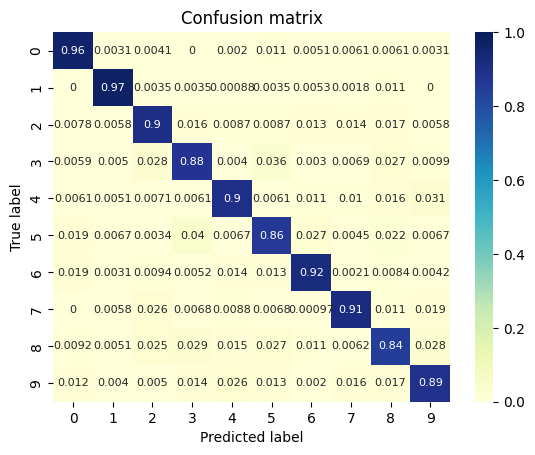

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
cm3 = confusion_matrix(y_test, y_pred)
cm_norm3 = cm3 / cm3.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm3, classes = [0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')